In [41]:
import sys
sys.path.append('/projects/junxianh/tride/tride')

import argparse
import numpy as np
import matplotlib.pyplot as plt
from openai_sentiment_neuron import sst_binary, train_with_reg_cv, train_with_reg

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
def read_input(keys):
    def parse_fname(fname):
        x = '.'.join(fname.split('.')[:-1])
        x = x.split('/')[-1]
        x = x.split('.')

        size = int(x[-2].split('size')[-1])
        embed = int(x[-1].split('hid')[-1])

        return size, embed

    size, embed = parse_fname(keys)
    keys = np.memmap(keys,
                     dtype=np.float32,
                     mode='r',
                     shape=(size, embed))

    return keys

In [154]:
data = '../openai_sentiment_neuron/data'
# train = '../hid_emb/sst/train.keys.layer-1.rpr_type_standard.size6920.hid1280.npy'
# val = '../hid_emb/sst/test.keys.layer-1.rpr_type_standard.size1821.hid1280.npy'
# test = '../hid_emb/sst/test.keys.layer-1.rpr_type_standard.size1821.hid1280.npy'

train = '../hid_emb/sst/train.keys.layer-1.rpr_type_ffn_input_after_ln.size6920.hid1280.npy'
val = '../hid_emb/sst/test.keys.layer-1.rpr_type_ffn_input_after_ln.size1821.hid1280.npy'
test = '../hid_emb/sst/test.keys.layer-1.rpr_type_ffn_input_after_ln.size1821.hid1280.npy'

In [155]:
trX, vaX, teX, trY, vaY, teY = sst_binary(data)

trXt = read_input(train)
vaXt = read_input(val)
teXt = read_input(test)

In [156]:

c = 0.01
# c = 2
# classification results
full_rep_acc, c, nnotzero, model = train_with_reg(trXt, trY, vaXt, vaY, teXt, teY, c=c, verbose=1)
print('%05.2f test accuracy'%full_rep_acc)
print('%05.3f regularization coef'%c)
print('%05d features used'%nnotzero)

[LibLinear]87.64 test accuracy
0.010 regularization coef
00021 features used


Text(0, 0.5, 'Neuron (Feature) weight')

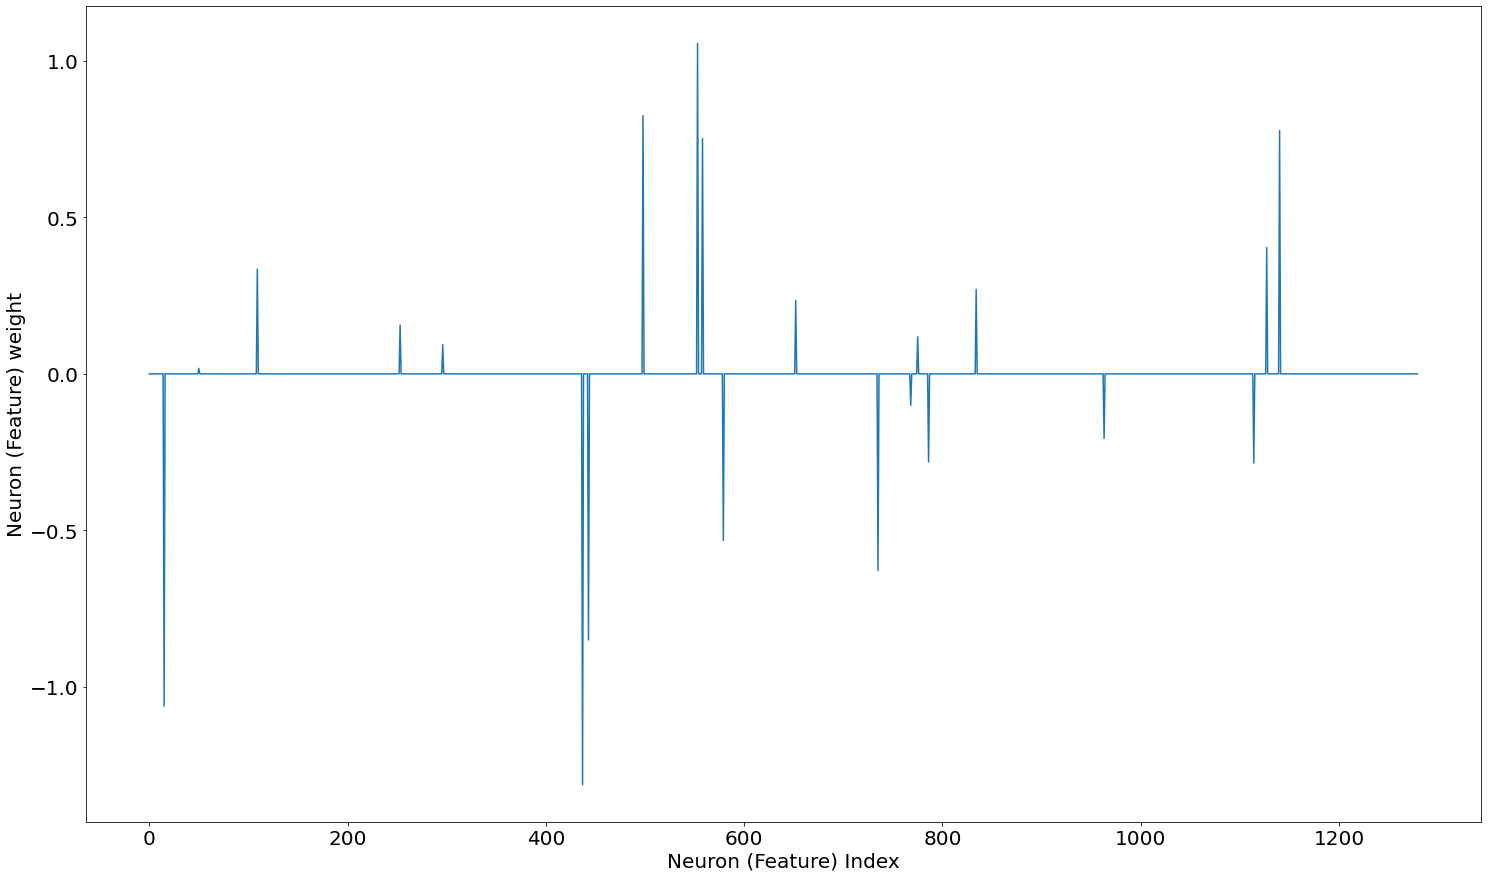

In [157]:
plt.figure(figsize=(25,15))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.plot(range(len(model.coef_[0])), model.coef_.T)
plt.xlabel('Neuron (Feature) Index', size=20)
plt.ylabel('Neuron (Feature) weight', size=20)

In [138]:
index=model.coef_[0].nonzero()[0]

In [140]:
a = model.coef_[:, index]

In [152]:
model.intercept_

array([0.])

In [146]:
model.coef_[0, index[2]]

0.3344852323116187

In [158]:
import torch
torch.save({'model': model}, 'sklearn_lgr_sst_ffn_input_after_ln.pt')

# model2 = torch.load('sklearn_model.pt')

In [134]:
model2.score(teXt, teY)

0.8764415156507414

In [115]:
data = '../openai_sentiment_neuron/data'
train3 = '../hid_emb/sst/train.keys.layer-1.rpr_type_standard.offset_-1.size6920.hid1280.npy'
val3 = '../hid_emb/sst/test.keys.layer-1.rpr_type_standard.offset_-1.size1821.hid1280.npy'
test3 = '../hid_emb/sst/test.keys.layer-1.rpr_type_standard.offset_-1.size1821.hid1280.npy'

trX, vaX, teX, trY, vaY, teY = sst_binary(data)

trXt3 = read_input(train3)
vaXt3 = read_input(val3)
teXt3 = read_input(test3)

In [121]:
model.score(teXt3, teY)

0.7902251510159253

In [90]:
model.score(teXt, teY)

0.9165293794618341

In [119]:
c = 0.2
# classification results
full_rep_acc, c, nnotzero, model = train_with_reg(trXt3, trY, vaXt3, vaY, teXt3, teY, c=c, verbose=1)
print('%05.2f test accuracy'%full_rep_acc)
print('%05.3f regularization coef'%c)
print('%05d features used'%nnotzero)

[LibLinear]85.94 test accuracy
0.200 regularization coef
00780 features used


Text(0, 0.5, 'Neuron (Feature) weight')

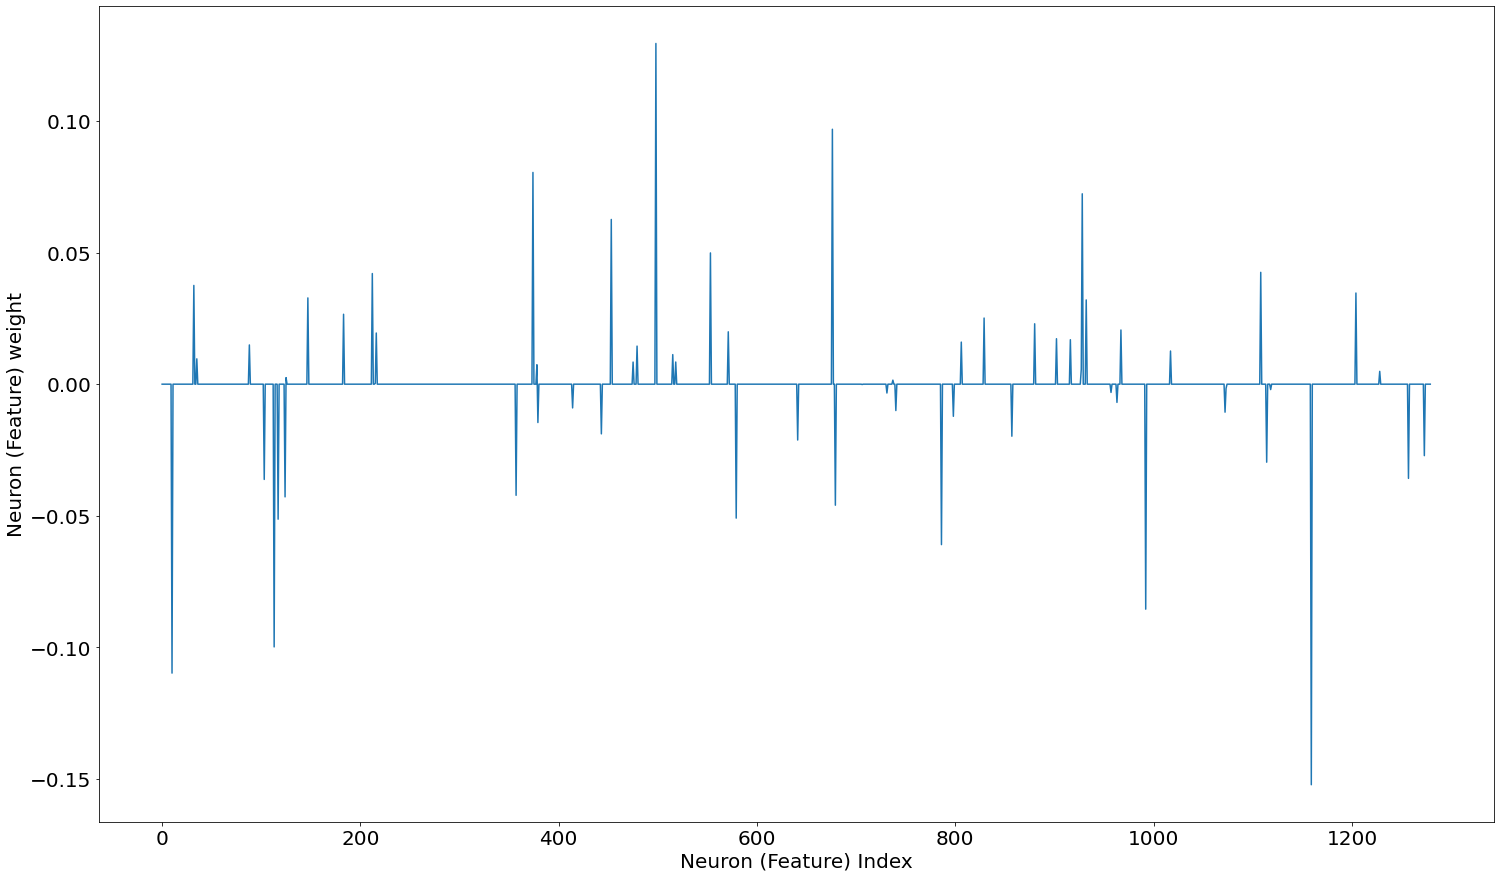

In [93]:
plt.figure(figsize=(25,15))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.plot(range(len(model.coef_[0])), model.coef_.T)
plt.xlabel('Neuron (Feature) Index', size=20)
plt.ylabel('Neuron (Feature) weight', size=20)

In [43]:
data = '../openai_sentiment_neuron/data'
train2 = '../hid_emb/sst/train.keys.layer-1.rpr_type_ffn_input_after_ln.size6920.hid1280.npy'
val2 = '../hid_emb/sst/test.keys.layer-1.rpr_type_ffn_input_after_ln.size1821.hid1280.npy'
test2 = '../hid_emb/sst/test.keys.layer-1.rpr_type_ffn_input_after_ln.size1821.hid1280.npy'

trX, vaX, teX, trY, vaY, teY = sst_binary(data)

trXt = read_input(train2)
vaXt = read_input(val2)
teXt = read_input(test2)

In [53]:
c = 0.01
# classification results
full_rep_acc, c, nnotzero, model = train_with_reg(trXt, trY, vaXt, vaY, teXt, teY, c=c, verbose=1)
print('%05.2f test accuracy'%full_rep_acc)
print('%05.2f regularization coef'%c)
print('%05d features used'%nnotzero)

[LibLinear]87.64 test accuracy
00.01 regularization coef
00021 features used


Text(0, 0.5, 'Neuron (Feature) weight')

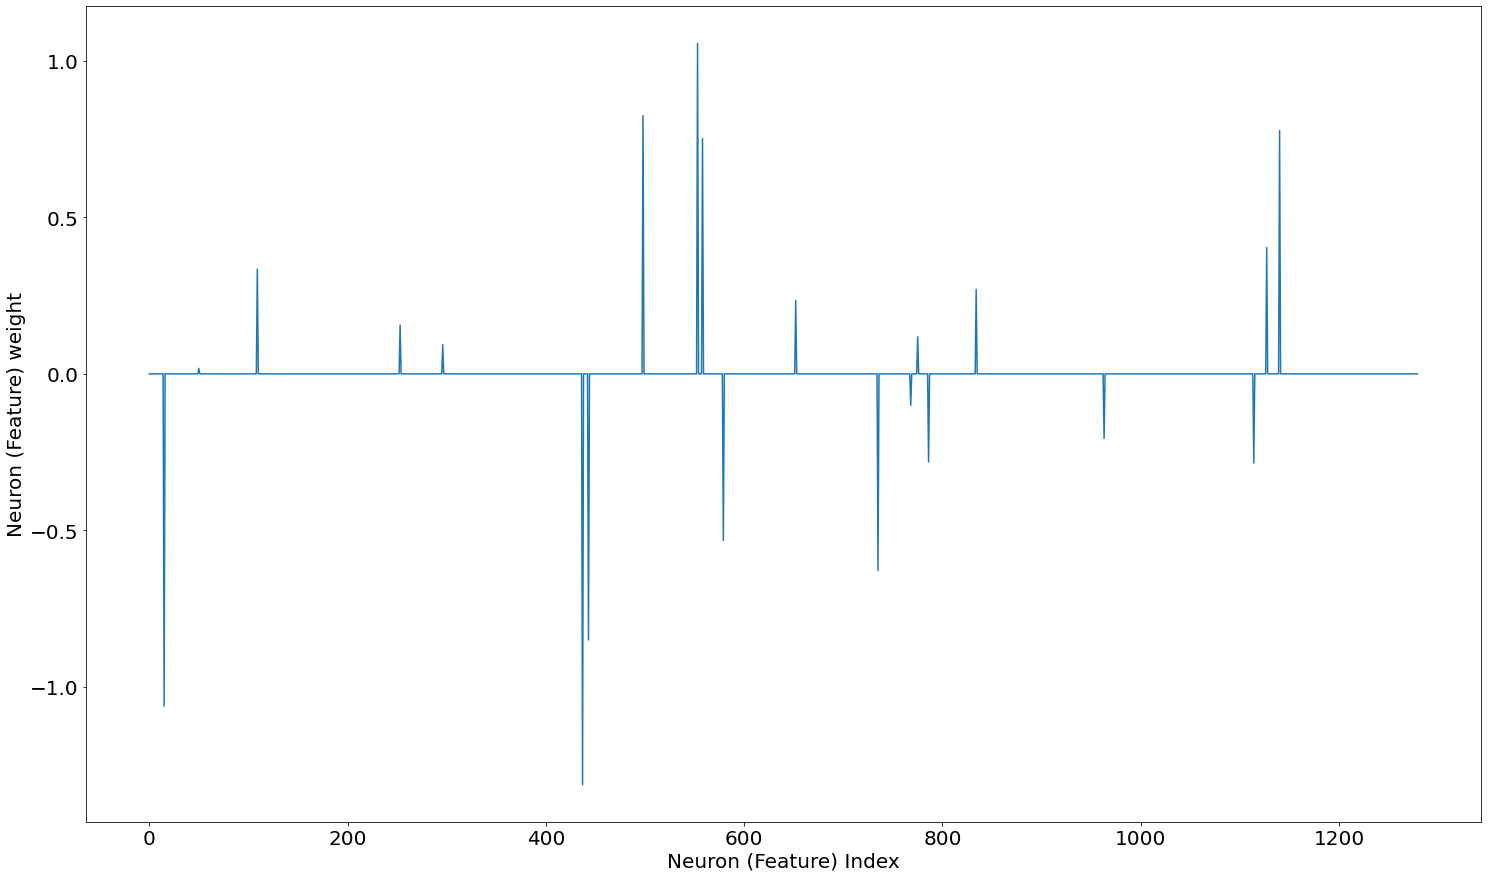

In [54]:
plt.figure(figsize=(25,15))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.plot(range(len(model.coef_[0])), model.coef_.T)
plt.xlabel('Neuron (Feature) Index', size=20)
plt.ylabel('Neuron (Feature) weight', size=20)